# Automated Chest Radiograph Analyser (ACRA) 

## Part01 - Building the CNN

In [1]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.
D:\Users\shiva\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\shiva\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\shiva\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\shiva\Anaconda3\envs\te

### Initialising the CNN

In [2]:
classifier = Sequential()

### Step01 - Convolution

In [3]:
classifier.add(Convolution2D(32, (3, 3), input_shape=(64,64,3), activation='relu'))

### Step02 - Pooling

In [4]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

### Adding more Convolutional Layer

In [5]:
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

### Step03 - Flattening

In [6]:
classifier.add(Flatten())

### Step04 - Full Connection

In [7]:
classifier.add(Dense(output_dim=128, activation='relu'))
classifier.add(Dense(output_dim=1, activation='sigmoid'))

D:\Users\shiva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
D:\Users\shiva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


### Compiling the CNN

In [8]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Classifier Summary

In [9]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

## Part02 - Fitting the CNN to the images

In [10]:
from keras.preprocessing.image import ImageDataGenerator

#Below pixels are rescaled to have value b/w 0 and 1 and different modifications are performed
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#Here only rescaling is done
test_datagen = ImageDataGenerator(rescale=1./255)

### Loading Data

In [11]:
train_generator = train_datagen.flow_from_directory('train',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory('test',
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='binary')

Found 4933 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Configuring Checkpointer 

In [12]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

### Fitting the CNN to data

In [13]:
history = classifier.fit_generator(train_generator,
                        samples_per_epoch=5216,
                        nb_epoch=25,
                        validation_data=validation_generator,
                        nb_val_samples=624)

D:\Users\shiva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
D:\Users\shiva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=163, epochs=25, validation_steps=624)`
  """



Epoch 1/25
163/163 [==============================] - 335s 2s/step - loss: 0.4392 - accuracy: 0.8009 - val_loss: 0.3064 - val_accuracy: 0.8192
Epoch 2/25
163/163 [==============================] - 233s 1s/step - loss: 0.2568 - accuracy: 0.8874 - val_loss: 0.1909 - val_accuracy: 0.8526
Epoch 3/25
163/163 [==============================] - 236s 1s/step - loss: 0.2411 - accuracy: 0.8997 - val_loss: 0.2811 - val_accuracy: 0.8509
Epoch 4/25
163/163 [==============================] - 1080s 7s/step - loss: 0.2267 - accuracy: 0.9068 - val_loss: 0.2209 - val_accuracy: 0.8751
Epoch 5/25
163/163 [==============================] - 252s 2s/step - loss: 0.1996 - accuracy: 0.9210 - val_loss: 0.0639 - val_accuracy: 0.8956
Epoch 6/25
163/163 [==============================] - 276s 2s/step - loss: 0.1858 - accuracy: 0.9270 - val_loss: 0.1668 - val_accuracy: 0.9005
Epoch 7/25
163/163 [==============================] - 256s 2s/step - loss: 0.1638 - accuracy: 0.9358 - val_loss: 0.2935 - val_accuracy: 0.88

D:\Users\shiva\Anaconda3\envs\tensorflow\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


163/163 [==============================] - 656s 4s/step - loss: 0.1379 - accuracy: 0.9489 - val_loss: 0.3691 - val_accuracy: 0.9133
Epoch 18/25
163/163 [==============================] - 266s 2s/step - loss: 0.1222 - accuracy: 0.9557 - val_loss: 0.3638 - val_accuracy: 0.8993
Epoch 19/25
163/163 [==============================] - 231s 1s/step - loss: 0.1232 - accuracy: 0.9551 - val_loss: 0.2360 - val_accuracy: 0.9295
Epoch 20/25
163/163 [==============================] - 250s 2s/step - loss: 0.1173 - accuracy: 0.9555 - val_loss: 0.4489 - val_accuracy: 0.8972
Epoch 21/25
163/163 [==============================] - 247s 2s/step - loss: 0.1076 - accuracy: 0.9622 - val_loss: 0.4150 - val_accuracy: 0.9262
Epoch 22/25
163/163 [==============================] - 246s 2s/step - loss: 0.1190 - accuracy: 0.9566 - val_loss: 0.3414 - val_accuracy: 0.9058
Epoch 23/25
163/163 [==============================] - 234s 1s/step - loss: 0.1132 - accuracy: 0.9584 - val_loss: 0.4272 - val_accuracy: 0.9023
Epoc

In [19]:
history.history

{'val_loss': [0.30641865730285645,
  0.19093504548072815,
  0.2810879349708557,
  0.22092986106872559,
  0.0638669952750206,
  0.16677729785442352,
  0.2934844493865967,
  0.37766218185424805,
  1.1829975843429565,
  0.24041837453842163,
  0.5594361424446106,
  0.2806456685066223,
  0.5728824138641357,
  0.3728896975517273,
  0.2439981997013092,
  0.033279649913311005,
  0.3691387176513672,
  0.363822877407074,
  0.235952690243721,
  0.4488626718521118,
  0.41499167680740356,
  0.34138357639312744,
  0.4272143244743347,
  0.24591483175754547,
  0.0729692354798317],
 'val_accuracy': [0.8191762566566467,
  0.852608859539032,
  0.8509141206741333,
  0.875102698802948,
  0.8956106305122375,
  0.9004724621772766,
  0.882908821105957,
  0.8593364953994751,
  0.860517680644989,
  0.8813733458518982,
  0.9182929396629333,
  0.918241560459137,
  0.8429539799690247,
  0.895645022392273,
  0.9167866110801697,
  0.9103327989578247,
  0.9133114218711853,
  0.8993426561355591,
  0.929488480091095,
 

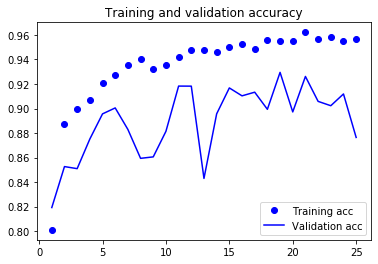

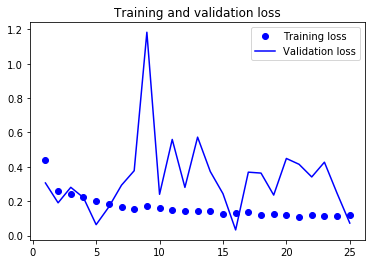

In [21]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()